# 1. Load dataset

#### In this assignment, you will use a student exams results dataset (exams.csv). It is a collection of exam scores and a binary value indicating whether the student has passed the course. You will need to read the data from data file (exams.csv). It contains three columns. First two columns (exam_1, exam_2) are exam scores of a student and the third value indicates whether the student has passed the course or not (1 or 0).
#### It is recommended to normalize the data at this stage. Gradient descent algorithm performs much better when the data is normalized. Use min-max normalization.

In [1]:
import pandas as pd

df = pd.read_csv('exams.csv')

min1 = df['exam_1'].min()
max1 = df['exam_1'].max()
range1 = max1 - min1

min2 = df['exam_2'].min()
max2 = df['exam_2'].max()
range2 = max2 - min1

ndf = df.copy()

ndf['exam_1'] = df['exam_1'].apply(lambda x: (x - min1)/range1)
ndf['exam_2'] = df['exam_2'].apply(lambda x: (x - min2)/range2)
#

print(ndf)
print(df)

      exam_1    exam_2  admitted
0   0.065428  0.689159         0
1   0.003266  0.193164         0
2   0.082968  0.614715         0
3   0.431764  0.809545         1
4   0.701943  0.650207         1
..       ...       ...       ...
95  0.765817  0.258347         1
96  0.174904  0.821103         1
97  0.992649  0.554742         1
98  0.362356  0.498886         1
99  0.640930  0.856358         1

[100 rows x 3 columns]
       exam_1     exam_2  admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
..        ...        ...       ...
95  83.489163  48.380286         1
96  42.261701  87.103851         1
97  99.315009  68.775409         1
98  55.340018  64.931938         1
99  74.775893  89.529813         1

[100 rows x 3 columns]


# 2. Visualize

#### Plot a graph of first exam score vs second exam score. Admitted student points should be green and failed student points should be red. It should look similar to the one below.
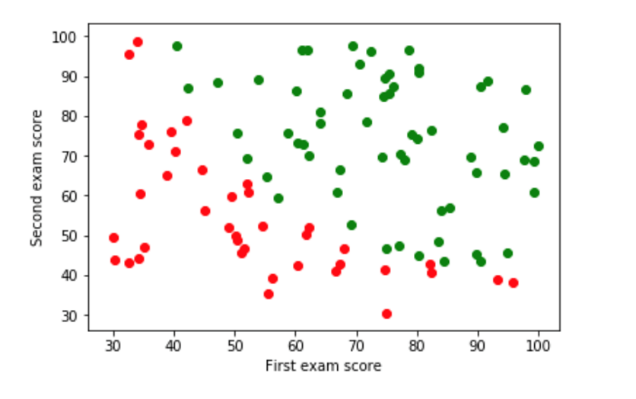

Text(0, 0.5, 'Second exam score')

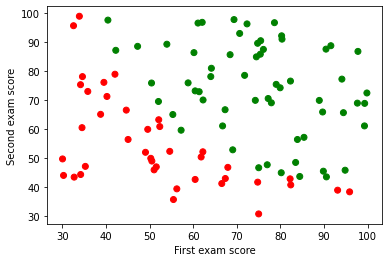

In [2]:
x = df['exam_1']
y = df['exam_2']

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('rg', ['r','w','g'], N = 2)


plt.scatter(x, y, c = df['admitted'], cmap = cmap)
plt.xlabel('First exam score')
plt.ylabel('Second exam score')

# 3. Logistic Regression

#### Implement Logistic Regression from scratch (using numpy)
a) Implement a function which returns sigmoid of a value given the value.

In [3]:
import numpy as np
def sigmoid(a):
    return np.reciprocal(np.add(1, np.exp(np.negative(a))))

b) Implement the following cost function.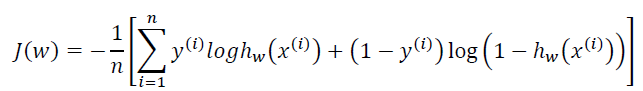

In [4]:
weights = np.array([1, 2, 3])

x0 = pd.Series(np.ones((100)))
x1 = ndf.iloc[:, 0]
x2 = ndf.iloc[:, 1]
x = pd.concat((x0, x1, x2), axis = 1)
y = ndf.iloc[:, 2]
y = y.values.reshape((-1, 1))
y = y.T

def cost(dataset, w):
    
    h = sigmoid(np.matmul(w.T, x.T))
    h = h.T
    
    loss = np.matmul(y, np.log(h)) + np.matmul(1-y, np.log(1 - h))
    
    j = (-1/np.size(y)) * loss
    j = j[0]
    return j
    
cost(ndf, weights)

1.1127287458633486

c) Write code that finds the best fit parameters for logistic regression using gradient descent from scratch. You should be able to change training step and number of iterations through the variables (or input to the function). In addition, you should save the cost value at each iteration for plottting.
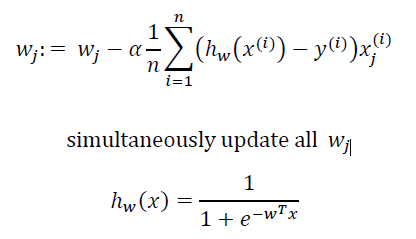

In [5]:
alpha = 0.1
n = 100000

cost_evolution = []

for i in range (0, n):
    
    cost_evolution.append(cost(ndf, weights))
    
    h = sigmoid(np.matmul(x, weights.T))
    loss = h - y.flatten()
    weights = weights - alpha*np.matmul(loss, x)/y.size
    if (i%100 == 0):
        print((i/n)*100)

cost_evolution.append(cost(ndf, weights))

C:\Users\EMINKH~1\AppData\Local\Temp/ipykernel_13248/961552652.py:12: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  weights = weights - alpha*np.matmul(loss, x)/y.size
C:\Users\EMINKH~1\AppData\Local\Temp/ipykernel_13248/3717728129.py:13: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of t

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7000000000000001
0.8
0.8999999999999999
1.0
1.0999999999999999
1.2
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.7999999999999998
1.9
2.0
2.1
2.1999999999999997
2.3
2.4
2.5
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5000000000000004
3.5999999999999996
3.6999999999999997
3.8
3.9
4.0
4.1000000000000005
4.2
4.3
4.3999999999999995
4.5
4.6
4.7
4.8
4.9
5.0
5.1
5.2
5.3
5.4
5.5
5.6000000000000005
5.7
5.800000000000001
5.8999999999999995
6.0
6.1
6.2
6.3
6.4
6.5
6.6000000000000005
6.7
6.800000000000001
6.9
7.000000000000001
7.1
7.199999999999999
7.3
7.3999999999999995
7.5
7.6
7.7
7.8
7.9
8.0
8.1
8.200000000000001
8.3
8.4
8.5
8.6
8.7
8.799999999999999
8.9
9.0
9.1
9.2
9.3
9.4
9.5
9.6
9.700000000000001
9.8
9.9
10.0
10.100000000000001
10.2
10.299999999999999
10.4
10.5
10.6
10.7
10.8
10.9
11.0
11.1
11.200000000000001
11.3
11.4
11.5
11.600000000000001
11.700000000000001
11.799999999999999
11.899999999999999
12.0

98.3
98.4
98.5
98.6
98.7
98.8
98.9
99.0
99.1
99.2
99.3
99.4
99.5
99.6
99.7
99.8
99.9


d) Plot the graph of the cost function and describe how it changes over iterations. It should look like the following:
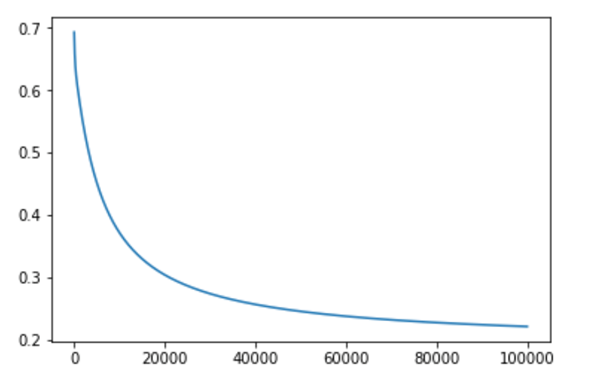

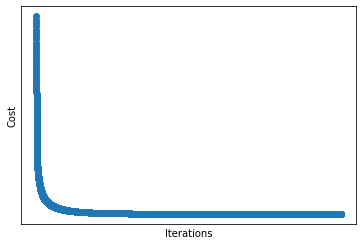

In [6]:
xplot = np.arange(start = 0, stop = n+1, step = 1)
yplot = np.array(cost_evolution)

plt.scatter(xplot, yplot)
plt.xticks(ticks = [])
plt.yticks(ticks = [])
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.show()

e) Plot points of the first exam score vs the second exam score. Admitted student points should be green and failed student points should be red. (same as Visualization part). And plot the decision boundary using the parameters found by gradient descent on the same graph. It should look similar to this:
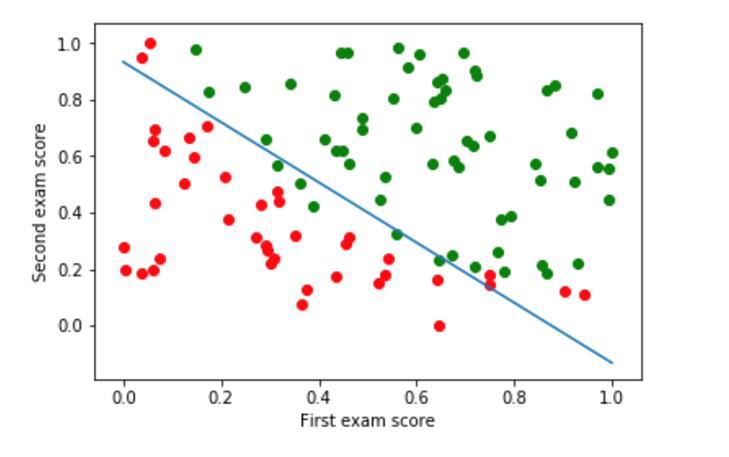

0        -12.653106
exam_1    14.231573
exam_2    13.706751
dtype: float64


Text(0, 0.5, 'Second exam score')

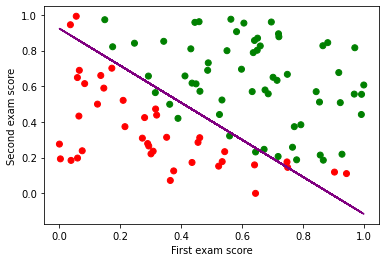

In [18]:
x1 = ndf['exam_1']
x2 = ndf['exam_2']

print(weights)

cmap = LinearSegmentedColormap.from_list('rg', ['r','w','g'], N = 2)

x2_pred = (-weights[0]-weights['exam_1']*x) / (weights['exam_2'])
plt.plot(x, x2_pred, color = 'purple' )

plt.scatter(x1, x2, c = df['admitted'], cmap = cmap)

plt.xlabel('First exam score')
plt.ylabel('Second exam score')

f) Make predictions of the training data using your trained model, compare predicted labels with actuals label and print the score indicating how well your model performs. You can use accuracy_score function from scikit-learn library. After doing that, check if your model makes correct predictions for these data: {55, 70, 1} and {40, 60, 0}.

In [30]:
from sklearn.metrics import accuracy_score


y_true = ndf['admitted'] 
y_pred = weights[0] + weights['exam_1']*x1 + weights['exam_2']*x2
y_pred = sigmoid(y_pred)
y_pred = y_pred.apply(lambda x: 1 if x >= 0.5 else 0)

accuracy_score(y_true, y_pred)

0.89

# 4. Logistic Regression using library

#### Use a library to perform logistic regression on the data. You should use the same features as input to this model and perform the same testing (3(f)) as above (using scikit-learn library is recommended).

      0    exam_1    exam_2
0   1.0  0.065428  0.689159
1   1.0  0.003266  0.193164
2   1.0  0.082968  0.614715
3   1.0  0.431764  0.809545
4   1.0  0.701943  0.650207
..  ...       ...       ...
95  1.0  0.765817  0.258347
96  1.0  0.174904  0.821103
97  1.0  0.992649  0.554742
98  1.0  0.362356  0.498886
99  1.0  0.640930  0.856358

[100 rows x 3 columns]
[[-5.54304460e-06  2.95605171e+00  2.43342081e+00]]
0        -12.653106
exam_1    14.231573
exam_2    13.706751
dtype: float64


Text(0, 0.5, 'Second exam score')

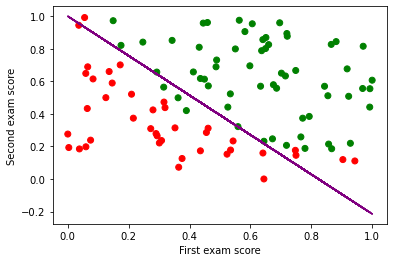

In [53]:
from sklearn.model_selection import train_test_split

x0 = pd.Series(np.ones((100)))
x1 = ndf.iloc[:, 0]
x2 = ndf.iloc[:, 1]
x = pd.concat((x0, x1, x2), axis = 1)
print(x)

y = ndf['admitted']

SEED = 42

x_train, x_test, y_train, y_test = \
        train_test_split(x, y, test_size =0.2, random_state = SEED)

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train, y_train)

print(reg.coef_)


x1 = ndf['exam_1']
x2 = ndf['exam_2']

print(weights)

cmap = LinearSegmentedColormap.from_list('rg', ['r','w','g'], N = 2)



x2_pred = (-reg.coef_[0][0] - x*reg.coef_[0][1]) / (reg.coef_[0][2]) + 1
plt.plot(x, x2_pred, color = 'purple' )

plt.scatter(x1, x2, c = df['admitted'], cmap = cmap)

plt.xlabel('First exam score')
plt.ylabel('Second exam score')

In [48]:
print(reg.coef_[0][0])

-5.543044604539921e-06
